## multi-modal, multi-label vit and cnn survival model 5-fold-CV result analysis

In [ ]:
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
import lifelines

from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
# Model prediction
data = pd.DataFrame()

for i in range(1,1+5):
    temp = pd.read_csv('Predictions_ViT{}.csv'.format(i))
    data = pd.concat([data, temp], ignore_index=True)
    
data = data.drop([data.columns[0]], axis=1)
data = data.sort_values(by=['ID']).reset_index(drop=True)
data

,ID,OS_risk,OS,Death,LFFS_risk,LFFS,LF,RFFS_risk,RFFS,RF,DFFS_risk,DFFS,DF
0,OPC-00001,14.988423,481,1,3.669844,481,0,2.751182,481,0,6.882381,481,0
1,OPC-00002,5.585012,3472,0,2.678481,3472,0,2.324451,3472,0,2.934763,3472,0
2,OPC-00004,4.349041,3274,0,1.761393,3274,0,1.472863,3274,0,1.709983,3274,0
3,OPC-00005,3.248554,3663,0,1.430695,3663,0,1.247972,3663,0,1.511627,3663,0
4,OPC-00008,12.743567,192,1,4.750291,39,1,3.898618,192,0,5.619485,189,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,OPC-00601,2.478722,3717,0,0.648746,3717,0,0.573150,3717,0,0.637211,3717,0
508,OPC-00602,8.155293,71,1,2.705130,71,0,2.215257,71,0,3.032011,71,0
509,OPC-00603,3.278542,3761,0,1.955276,3761,0,1.539500,3761,0,1.630437,1888,1
510,OPC-00604,17.307743,1618,1,6.485960,1618,0,3.072266,1618,0,4.180066,1618,0


In [ ]:
clinic = pd.read_csv('Clinical_List.csv')
clinic

,ID,Age,Sex,ECOG,SMOKE1,SMOKE2,Drink,Subsite,T,N,...,Dose,Fraction,Death,Dig2Follow,LF,Dig2LF,RF,Dig2RF,DF,Dig2DF
0,OPC-00001,62.57,-1,0,50.0,0,2,7,5,4,...,60.0,25,1,481,0,481,0,481,0,481
1,OPC-00002,59.75,-1,0,0.0,-1,-2,0,5,0,...,64.0,40,0,3472,0,3472,0,3472,0,3472
2,OPC-00004,59.73,1,0,40.0,1,0,3,3,0,...,64.0,40,0,3274,0,3274,0,3274,0,3274
3,OPC-00005,68.72,1,0,40.0,0,-2,1,3,4,...,70.0,35,0,3663,0,3663,0,3663,0,3663
4,OPC-00008,63.54,-1,1,0.0,-1,-2,1,5,4,...,70.0,35,1,192,1,39,0,192,1,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,OPC-00601,56.45,1,0,60.0,1,2,6,1,0,...,51.0,20,0,3717,0,3717,0,3717,0,3717
508,OPC-00602,56.96,1,1,60.0,0,-2,2,3,0,...,54.4,34,1,71,0,71,0,71,0,71
509,OPC-00603,66.16,-1,1,0.0,-1,-2,1,4,0,...,70.0,35,0,3761,0,3761,0,3761,1,1888
510,OPC-00604,82.48,-1,1,50.0,0,2,3,2,0,...,51.0,20,1,1618,0,1618,0,1618,0,1618


In [ ]:
clinic.columns

Index(['ID', 'Age', 'Sex', 'ECOG', 'SMOKE1', 'SMOKE2', 'Drink', 'Subsite', 'T',
       'N', 'AJCC', 'HPV', 'Chemo', 'Dig2RT', 'Dig2RTend', 'Dose', 'Fraction',
       'Death', 'Dig2Follow', 'LF', 'Dig2LF', 'RF', 'Dig2RF', 'DF', 'Dig2DF'],
      dtype='object')

In [ ]:
data = data[clinic['Chemo']==1].reset_index(drop=True)
data

,ID,OS_risk,OS,Death,LFFS_risk,LFFS,LF,RFFS_risk,RFFS,RF,DFFS_risk,DFFS,DF
0,OPC-00005,3.248554,3663,0,1.430695,3663,0,1.247972,3663,0,1.511627,3663,0
1,OPC-00008,12.743567,192,1,4.750291,39,1,3.898618,192,0,5.619485,189,1
2,OPC-00012,1.793600,3516,0,0.953789,3516,0,0.896477,3516,0,1.132652,3516,0
3,OPC-00013,3.179997,3258,0,1.588363,3258,0,1.347171,3258,0,1.612911,3258,0
4,OPC-00014,1.359064,2800,0,0.830798,2800,0,0.746517,2800,0,0.863375,2800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,OPC-00593,1.520636,4535,0,1.025619,4535,0,0.914926,4535,0,0.995581,4535,0
247,OPC-00595,1.941002,3401,0,0.847413,3401,0,0.872840,3401,0,0.989163,3401,0
248,OPC-00596,1.109411,4339,0,0.576797,4339,0,0.537476,4339,0,0.515381,4339,0
249,OPC-00600,2.112057,333,1,1.136379,269,1,1.144786,333,0,1.307155,333,0


In [ ]:
data['OS_risk'].values

array([ 3.2485542 , 12.743567  ,  1.7935996 ,  3.1799965 ,  1.3590639 ,
        2.1792336 ,  3.5678186 ,  1.5177447 ,  4.4086266 ,  6.334838  ,
       11.311324  ,  1.0183748 ,  1.590315  ,  2.9750197 ,  5.4061127 ,
        2.7441812 ,  1.1202613 ,  1.3738811 ,  2.9788148 ,  1.9997013 ,
        2.7499447 ,  6.561894  ,  1.1028229 ,  1.4940267 ,  8.409751  ,
        4.554826  ,  2.0141973 ,  1.5991234 ,  2.7562187 ,  3.5106187 ,
        6.1442556 ,  1.5371647 ,  1.664608  , 37.919506  , 26.302448  ,
        1.6238608 ,  1.0644149 ,  2.2431986 ,  0.8419557 ,  1.120608  ,
        3.3725004 ,  8.94199   ,  5.1311126 ,  7.386059  ,  1.7557735 ,
        1.5754397 ,  4.405351  ,  2.3346834 ,  3.1499457 , 10.109003  ,
        1.6099126 ,  1.8475869 ,  3.8699467 ,  1.6990623 ,  2.3836637 ,
        1.9438753 ,  1.3295612 ,  1.9855562 ,  1.5185771 ,  1.2115635 ,
        1.0649432 ,  3.396243  ,  6.607889  ,  1.3353157 ,  0.95849377,
        0.9774553 ,  3.9321585 ,  7.5583324 ,  3.039391  ,  1.28

/tmp/ipykernel_1229650/919612695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650
/tmp/ipykernel_1229650/919612695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650


C-index is 0.7860568320091619


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          38.57 <0.005     30.82

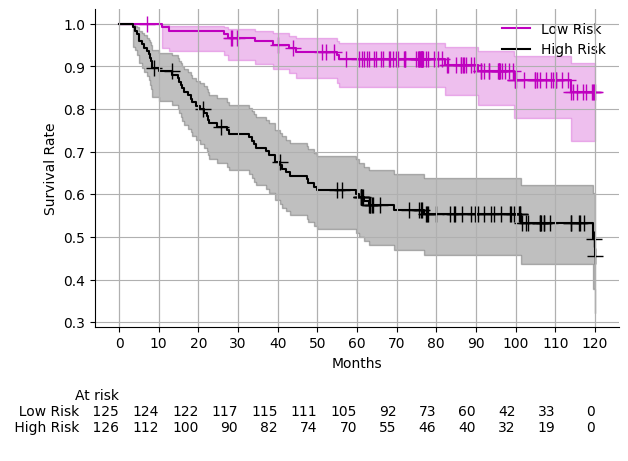

In [ ]:
duration = data[['OS']]
duration[duration>3650]=3650
duration /= (365/12)
event = data[['Death']]

score = concordance_index(
                event_times=duration, 
                predicted_scores = -data['OS_risk'], 
                event_observed= event,
            )
print('C-index is', score)

high_risk_ind = np.argwhere(data['OS_risk'].values >= np.median(data['OS_risk']))
low_risk_ind = np.argwhere(data['OS_risk'].values < np.median(data['OS_risk']))

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_low = lifelines.KaplanMeierFitter()
ax = kmf_low.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="Low Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_high = lifelines.KaplanMeierFitter()
ax = kmf_high.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="High Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,13))
plt.grid()
plt.xlabel('Months')
plt.ylabel('Survival Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_low, kmf_high, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()

In [ ]:
os_temp = data[['OS_risk', 'OS', 'Death']]
os_temp

,OS_risk,OS,Death
0,3.248554,3663,0
1,12.743567,192,1
2,1.793600,3516,0
3,3.179997,3258,0
4,1.359064,2800,0
...,...,...,...
246,1.520636,4535,0
247,1.941002,3401,0
248,1.109411,4339,0
249,2.112057,333,1


In [ ]:
from lifelines import CoxPHFitter
cph = CoxPHFitter() # sparse solutions,
cph.fit(os_temp, 'OS', 'Death')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 251 total observations, 180 right-censored observations>
             duration col = 'OS'
                event col = 'Death'
      baseline estimation = breslow
   number of observations = 251
number of events observed = 71
   partial log-likelihood = -354.63
         time fit was run = 2023-05-06 17:06:01 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
OS_risk     0.09       1.09       0.01             0.07             0.11                 1.07                 1.12

            cmp to    z      p   -log2(p)
covariate                                
OS_risk       0.00 7.74 <0.005      46.55
---
Concordance = 0.79
Partial AIC = 711.26
log-likelihood ratio test = 32.40 on 1 df
-log2(p) of ll-ratio test = 26.25

In [ ]:
def CalAUC(data, risk, duration, event, title = "Patient Death Prediction"):
    ### AUC at 1, 3, 5 years for binary prediction (event vs no_event)
    temp = data[(data[duration]>=365)|((data[duration]<365)&(data[event]==1))]
    label = temp[duration]<=365
    print('number of patient: {}, number of event: {}'.format(len(label), len(temp[temp[duration]<=365])))
    fpr, tpr, thresholds = metrics.roc_curve(label.values, temp[risk], pos_label=1)
    auc = metrics.auc(fpr, tpr)

    #create ROC curve
    plt.plot(fpr,tpr, label="One-Year Event (AUC = {:.2f})".format(auc))

    #
    temp = data[(data[duration]>=365*3)|((data[duration]<365*3)&(data[event]==1))]
    label = temp[duration]<=365*3
    print('number of patient: {}, number of event: {}'.format(len(label), len(temp[temp[duration]<=365*3])))
    fpr, tpr, thresholds = metrics.roc_curve(label.values, temp[risk], pos_label=1)
    auc = metrics.auc(fpr, tpr)
    #create ROC curve
    plt.plot(fpr,tpr, label="Three-Year Event (AUC = {:.2f})".format(auc))

    #
    temp = data[(data[duration]>=365*5)|((data[duration]<365*5)&(data[event]==1))]
    label = temp[duration]<=365*5
    print('number of patient: {}, number of event: {}'.format(len(label), len(temp[temp[duration]<=365*5])))
    fpr, tpr, thresholds = metrics.roc_curve(label.values, temp[risk], pos_label=1)
    auc = metrics.auc(fpr, tpr)
    #create ROC curve
    plt.plot(fpr,tpr, label="Five-Year Event (AUC = {:.2f})".format(auc))

    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    # plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    # plt.show()
    
    # plt.savefig(title, dpi=300)

number of patient: 249, number of event: 15
number of patient: 243, number of event: 41
number of patient: 234, number of event: 59


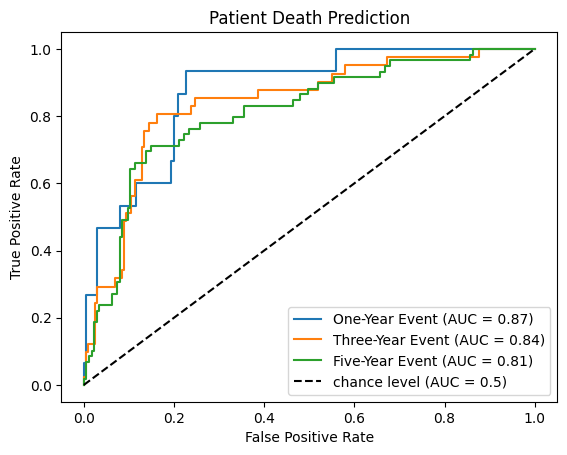

In [ ]:
CalAUC(data[['OS_risk', 'OS', 'Death']], 'OS_risk', 'OS', 'Death')

In [ ]:
def Cal_ConfidenceInterval(data, risk_name, duration_name, event_name, iteration=10000, alpha=0.95):
    stats = list()
    for i in range(iteration):
        data_sample = data.sample(frac=0.632, replace=True)
        try:
            stats.append(concordance_index(
                    event_times=data_sample[duration_name], 
                    predicted_scores = -data_sample[risk_name], 
                    event_observed= data_sample[event_name],
                ))
        except:
            continue
    plt.hist(stats)
    plt.show()
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(stats, p))
    print('%.1f confidence interval %.3f and %.3f' % (alpha*100, lower, upper))   
    
    return stats

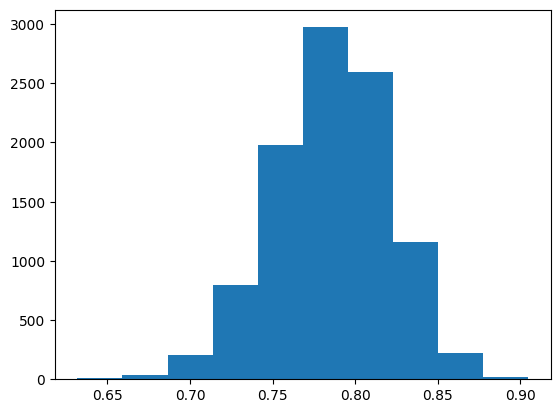

95.0 confidence interval 0.714 and 0.850


In [ ]:
scores_OS = Cal_ConfidenceInterval(data[['OS_risk', 'OS', 'Death']], 'OS_risk', 'OS', 'Death')

In [ ]:
np.median(scores_OS)

0.7867401825501956

C-index is 0.8358613217768147


/tmp/ipykernel_1229650/574357833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650
/tmp/ipykernel_1229650/574357833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          11.92 <0.005     10.81

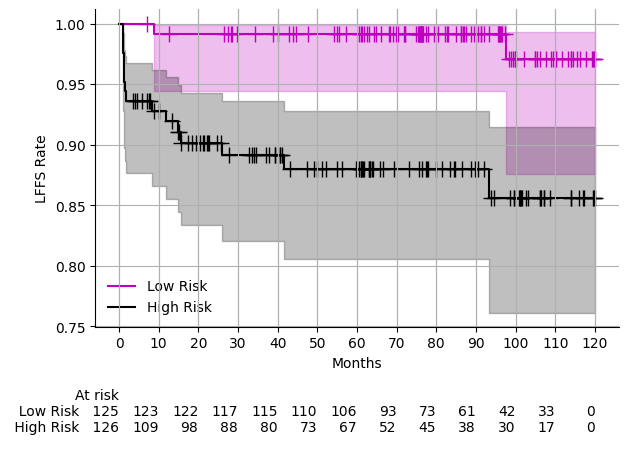

In [ ]:
duration = data[['LFFS']]
duration[duration>3650]=3650
duration /= (365/12)
event = data[['LF']]


score = concordance_index(
                event_times=duration, 
                predicted_scores = -data['LFFS_risk'].values, 
                event_observed= event,
            )
print('C-index is', score)

high_risk_ind = np.argwhere(data['LFFS_risk'].values >= np.median(data['LFFS_risk']))
low_risk_ind = np.argwhere(data['LFFS_risk'].values < np.median(data['LFFS_risk']))

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_low = lifelines.KaplanMeierFitter()
ax = kmf_low.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="Low Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_high = lifelines.KaplanMeierFitter()
ax = kmf_high.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="High Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,13))
plt.grid()
plt.xlabel('Months')
plt.ylabel('LFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_low, kmf_high, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
# plt.savefig('ViT_LFFS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()

number of patient: 241, number of event: 11
number of patient: 214, number of event: 14
number of patient: 188, number of event: 15


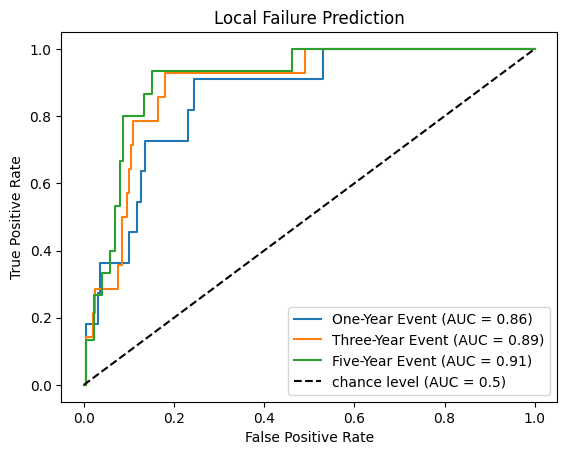

In [ ]:
CalAUC(data[['LFFS_risk', 'LFFS', 'LF']], 'LFFS_risk', 'LFFS', 'LF',"Local Failure Prediction")

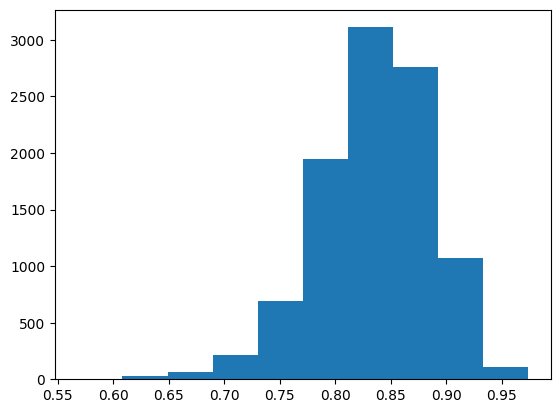

95.0 confidence interval 0.723 and 0.921


0.8389312823639979

In [ ]:
score_LF = Cal_ConfidenceInterval(data[['LFFS_risk', 'LFFS', 'LF']], 'LFFS_risk', 'LFFS', 'LF')
np.median(score_LF)

C-index is 0.845687811831789


/tmp/ipykernel_1229650/4163805120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650
/tmp/ipykernel_1229650/4163805120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           7.92 <0.005      7.68

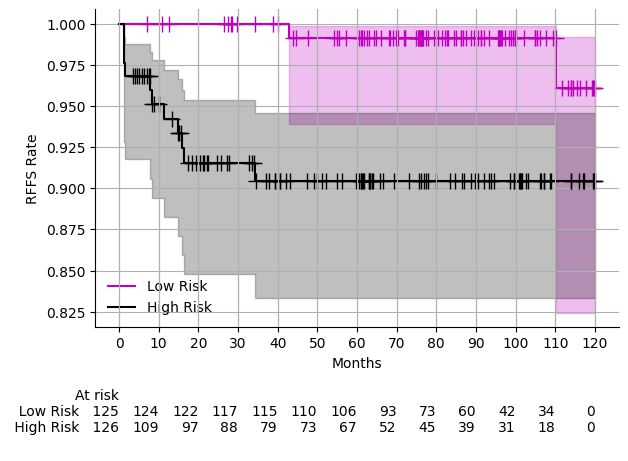

In [ ]:
duration = data[['RFFS']]
duration[duration>3650]=3650
duration /= (365/12)
event = data[['RF']]

score = concordance_index(
                event_times=duration, 
                predicted_scores = -data['RFFS_risk'].values, 
                event_observed= event,
            )
print('C-index is', score)

high_risk_ind = np.argwhere(data['RFFS_risk'].values >= np.median(data['RFFS_risk']))
low_risk_ind = np.argwhere(data['RFFS_risk'].values < np.median(data['RFFS_risk']))

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_low = lifelines.KaplanMeierFitter()
ax = kmf_low.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="Low Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_high = lifelines.KaplanMeierFitter()
ax = kmf_high.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="High Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,13))
plt.grid()
plt.xlabel('Months')
plt.ylabel('RFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_low, kmf_high, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
# plt.savefig('ViT_RFFS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()

number of patient: 237, number of event: 7
number of patient: 210, number of event: 11
number of patient: 185, number of event: 12


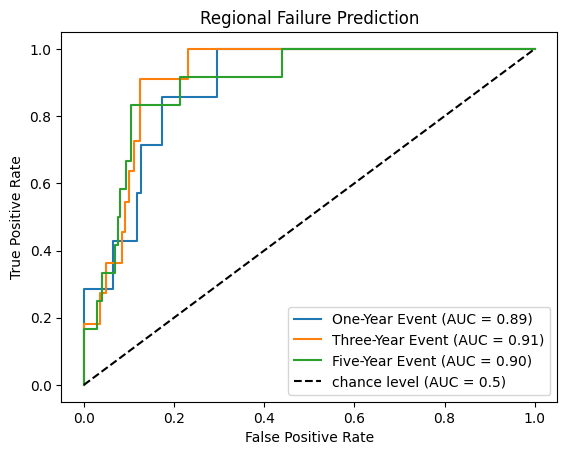

In [ ]:
CalAUC(data[['RFFS_risk', 'RFFS', 'RF']], 'RFFS_risk', 'RFFS', 'RF',"Regional Failure Prediction")

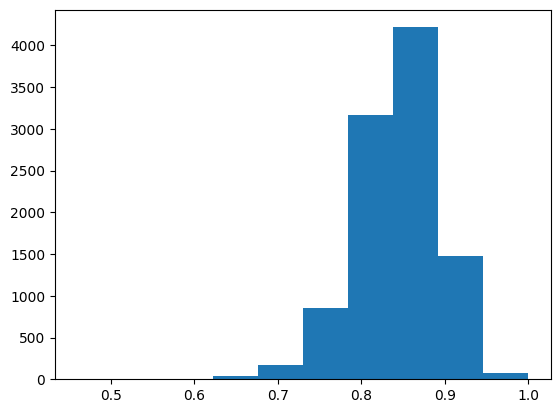

95.0 confidence interval 0.735 and 0.929


In [ ]:
score_RF = Cal_ConfidenceInterval(data[['RFFS_risk', 'RFFS', 'RF']], 'RFFS_risk', 'RFFS', 'RF')

In [ ]:
np.median(score_RF)

0.8468784909247049

C-index is 0.7609281437125749


/tmp/ipykernel_1229650/270501591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650
/tmp/ipykernel_1229650/270501591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          11.10 <0.005     10.18

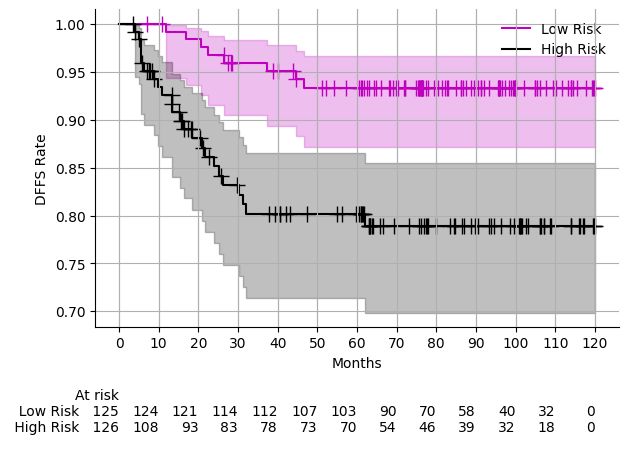

In [ ]:
duration = data[['DFFS']]
duration[duration>3650]=3650
duration /= (365/12)
event = data[['DF']]

score = concordance_index(
                event_times=duration, 
                predicted_scores = -data['DFFS_risk'].values, 
                event_observed= event,
            )
print('C-index is', score)

high_risk_ind = np.argwhere(data['DFFS_risk'].values >= np.median(data['DFFS_risk']))
low_risk_ind = np.argwhere(data['DFFS_risk'].values < np.median(data['DFFS_risk']))

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_low = lifelines.KaplanMeierFitter()
ax = kmf_low.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="Low Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_high = lifelines.KaplanMeierFitter()
ax = kmf_high.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="High Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,13))
plt.grid()
plt.xlabel('Months')
plt.ylabel('DFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_low, kmf_high, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
# plt.savefig('ViT_DFS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()

number of patient: 239, number of event: 10
number of patient: 221, number of event: 27
number of patient: 203, number of event: 30


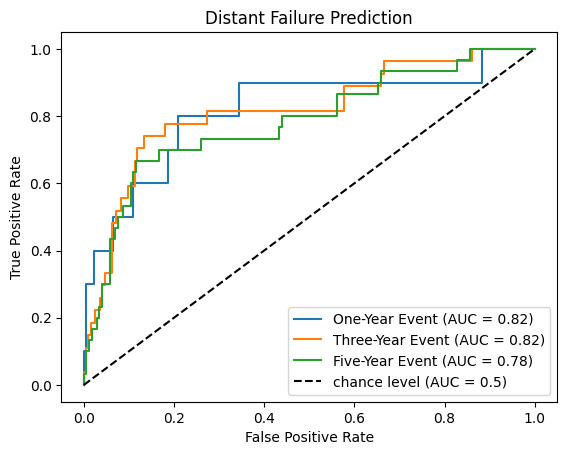

In [ ]:
CalAUC(data[['DFFS_risk', 'DFFS', 'DF']], 'DFFS_risk', 'DFFS', 'DF',"Distant Failure Prediction")

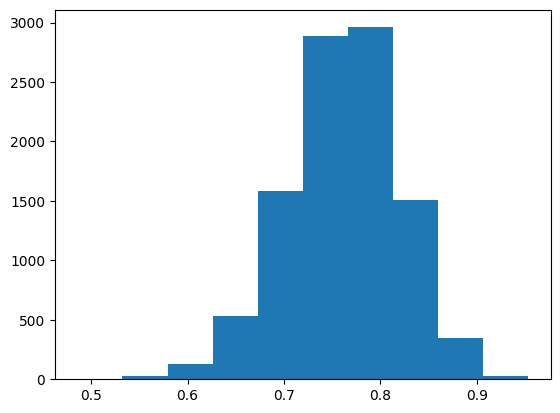

95.0 confidence interval 0.639 and 0.869


In [ ]:
score_DF = Cal_ConfidenceInterval(data[['DFFS_risk', 'DFFS', 'DF']], 'DFFS_risk', 'DFFS', 'DF')

In [ ]:
np.median(score_DF)

0.7639450037680409